<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/5_ADROIT_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Android = pd.read_csv("/content/drive/MyDrive/TMLC/Android.zip")

In [4]:
Android.head(3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.0,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.0,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fort

In [5]:
Android.shape

(29999, 184)

In [6]:
train_original = Android.copy()

In [11]:
Android.dropna(inplace=True)

-------------

### **Concatenate Features**

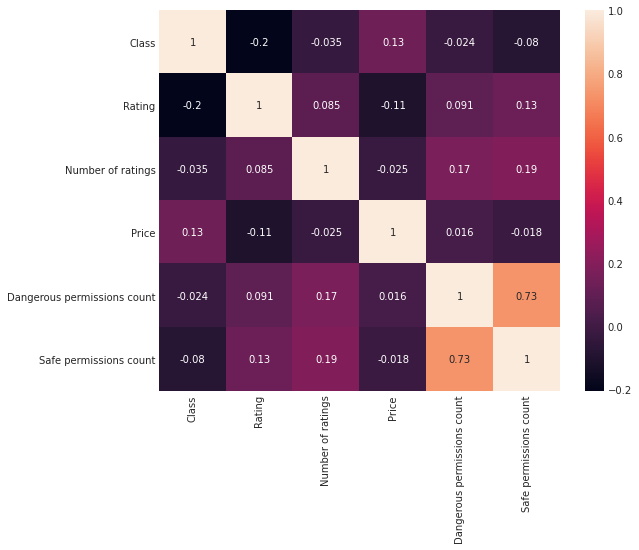

In [21]:
plt.figure(figsize=(8,7))
sns.heatmap(pd.concat([Android.iloc[:,[183]],  Android.iloc[:,:10]], axis=1).corr(), annot=True);

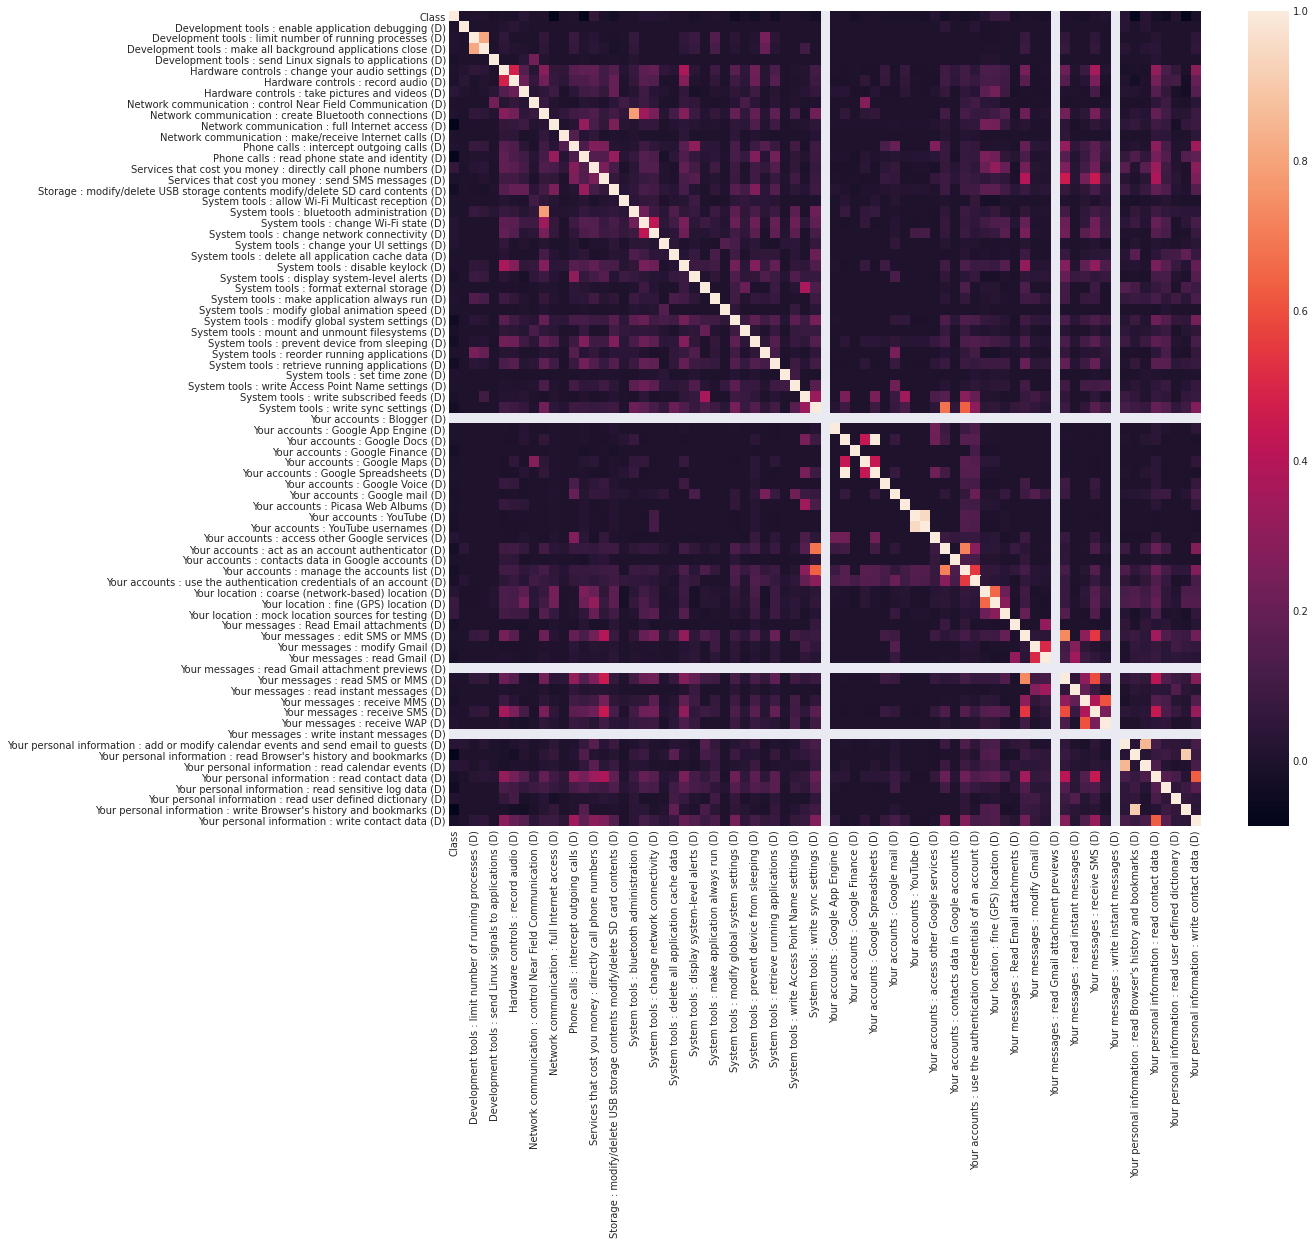

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.concat([Android.iloc[:,[183]],  Android.loc[:,dangerous_cols]], axis=1).corr());

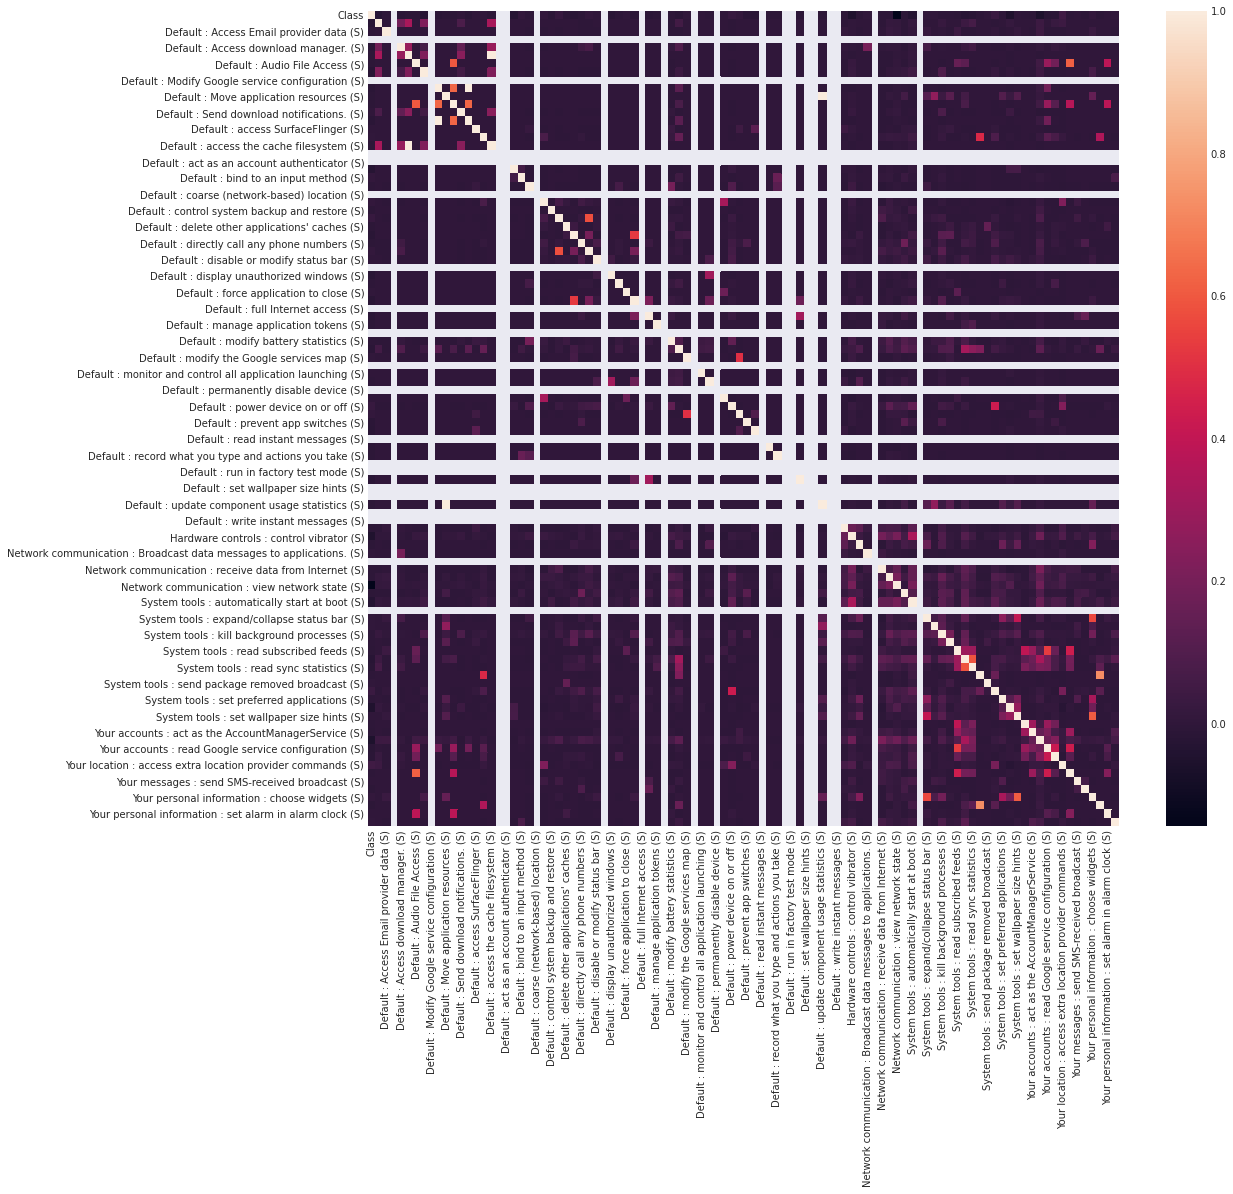

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.concat([Android.iloc[:,[183]],  Android.loc[:,safe_cols]], axis=1).corr());

------------------

### **List Features**

In [7]:
features = ['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count', 'Class']
Correlation = pd.DataFrame(Android, columns=features)

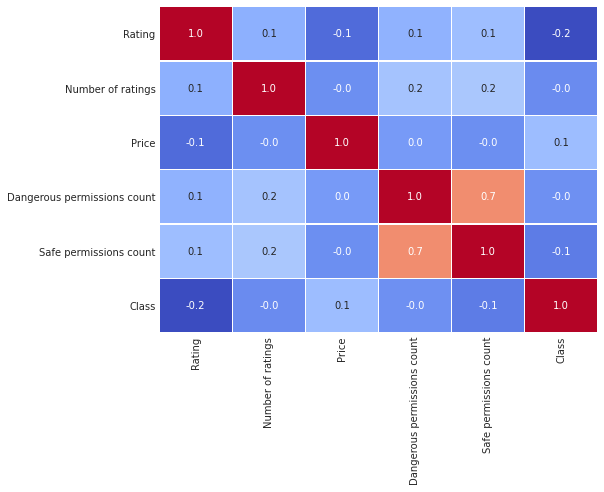

In [12]:
# Pearson Correlation
plt.figure(figsize=(7,6))
sns.heatmap(Correlation.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [19]:
dangerous_cols = Android.columns[Android.columns.str.contains("\(D\)")].tolist()
safe_cols = Android.columns[Android.columns.str.contains("\(S\)")].tolist()

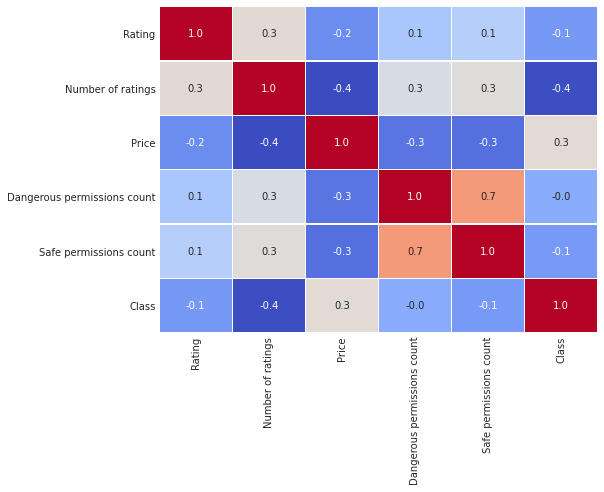

In [13]:
# Spearman Correlation
plt.figure(figsize=(7,6))
sns.heatmap(Correlation.corr(method='spearman'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

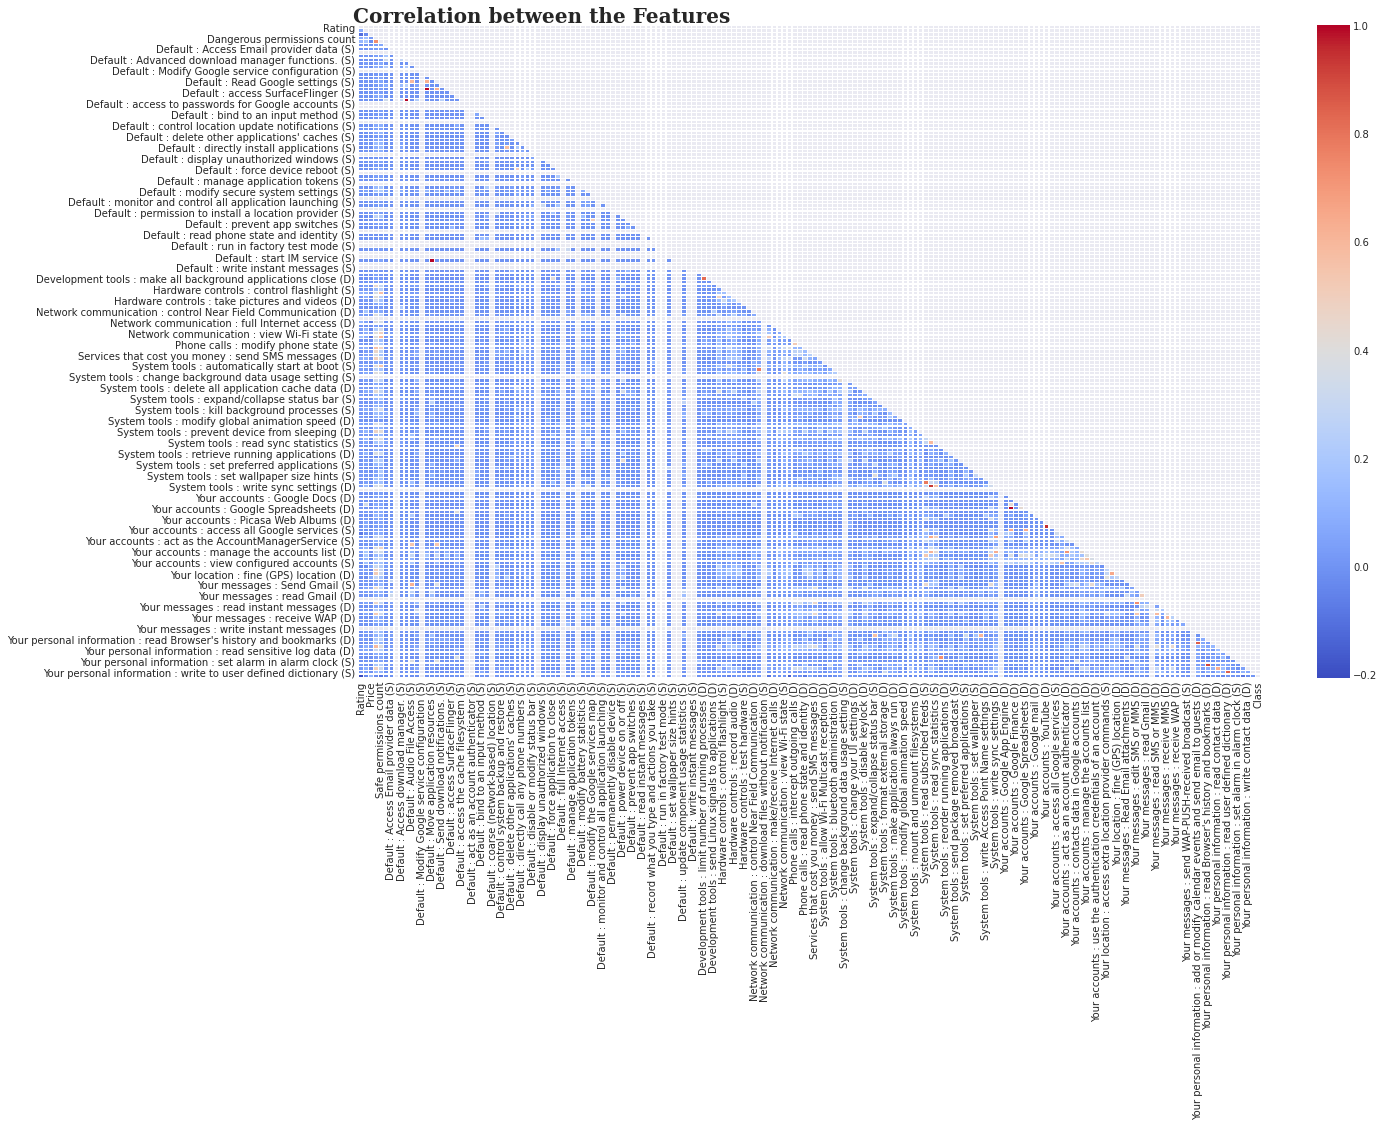

In [26]:
fig, ax = plt.subplots(figsize=(18, 12))
corr = Android.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax.text(-1.1, -0.7, 'Correlation between the Features', fontsize=20, fontweight='bold', fontfamily='serif')
sns.heatmap(corr, mask=mask, annot=False, fmt='.2f', linewidth=0.2, cbar=True, cmap='coolwarm');

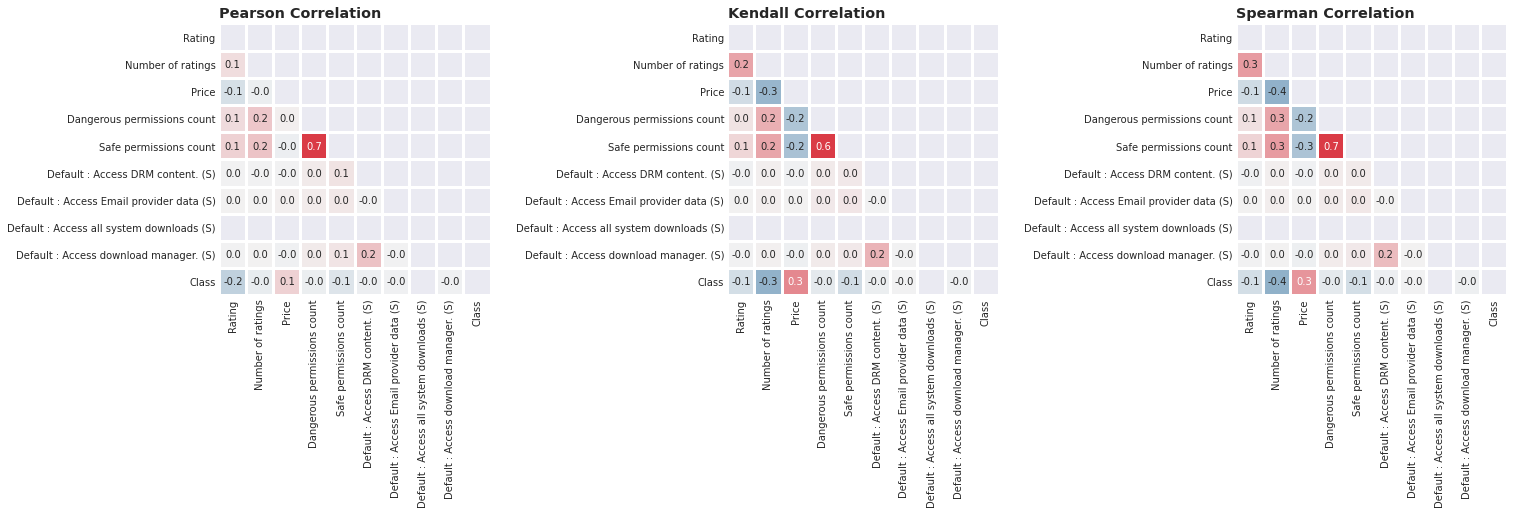

In [27]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(23 , 5))

feature_lst = ['Rating', 'Number of ratings', 'Price','Dangerous permissions count','Safe permissions count', 'Default : Access DRM content. (S)',
               'Default : Access Email provider data (S)', 'Default : Access all system downloads (S)', 'Default : Access download manager. (S)', 'Class']

corr = Android[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(Android[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.1f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

In [29]:
df_num = Android.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,3.1,77,0.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,4.3,199,0.0,3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.1,243,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
df_num_corr = df_num.corr()['Class'][:-1]
feature_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Class:\n{}".format(len(feature_list), feature_list))

There are 0 strongly correlated values with Class:
Series([], Name: Class, dtype: float64)


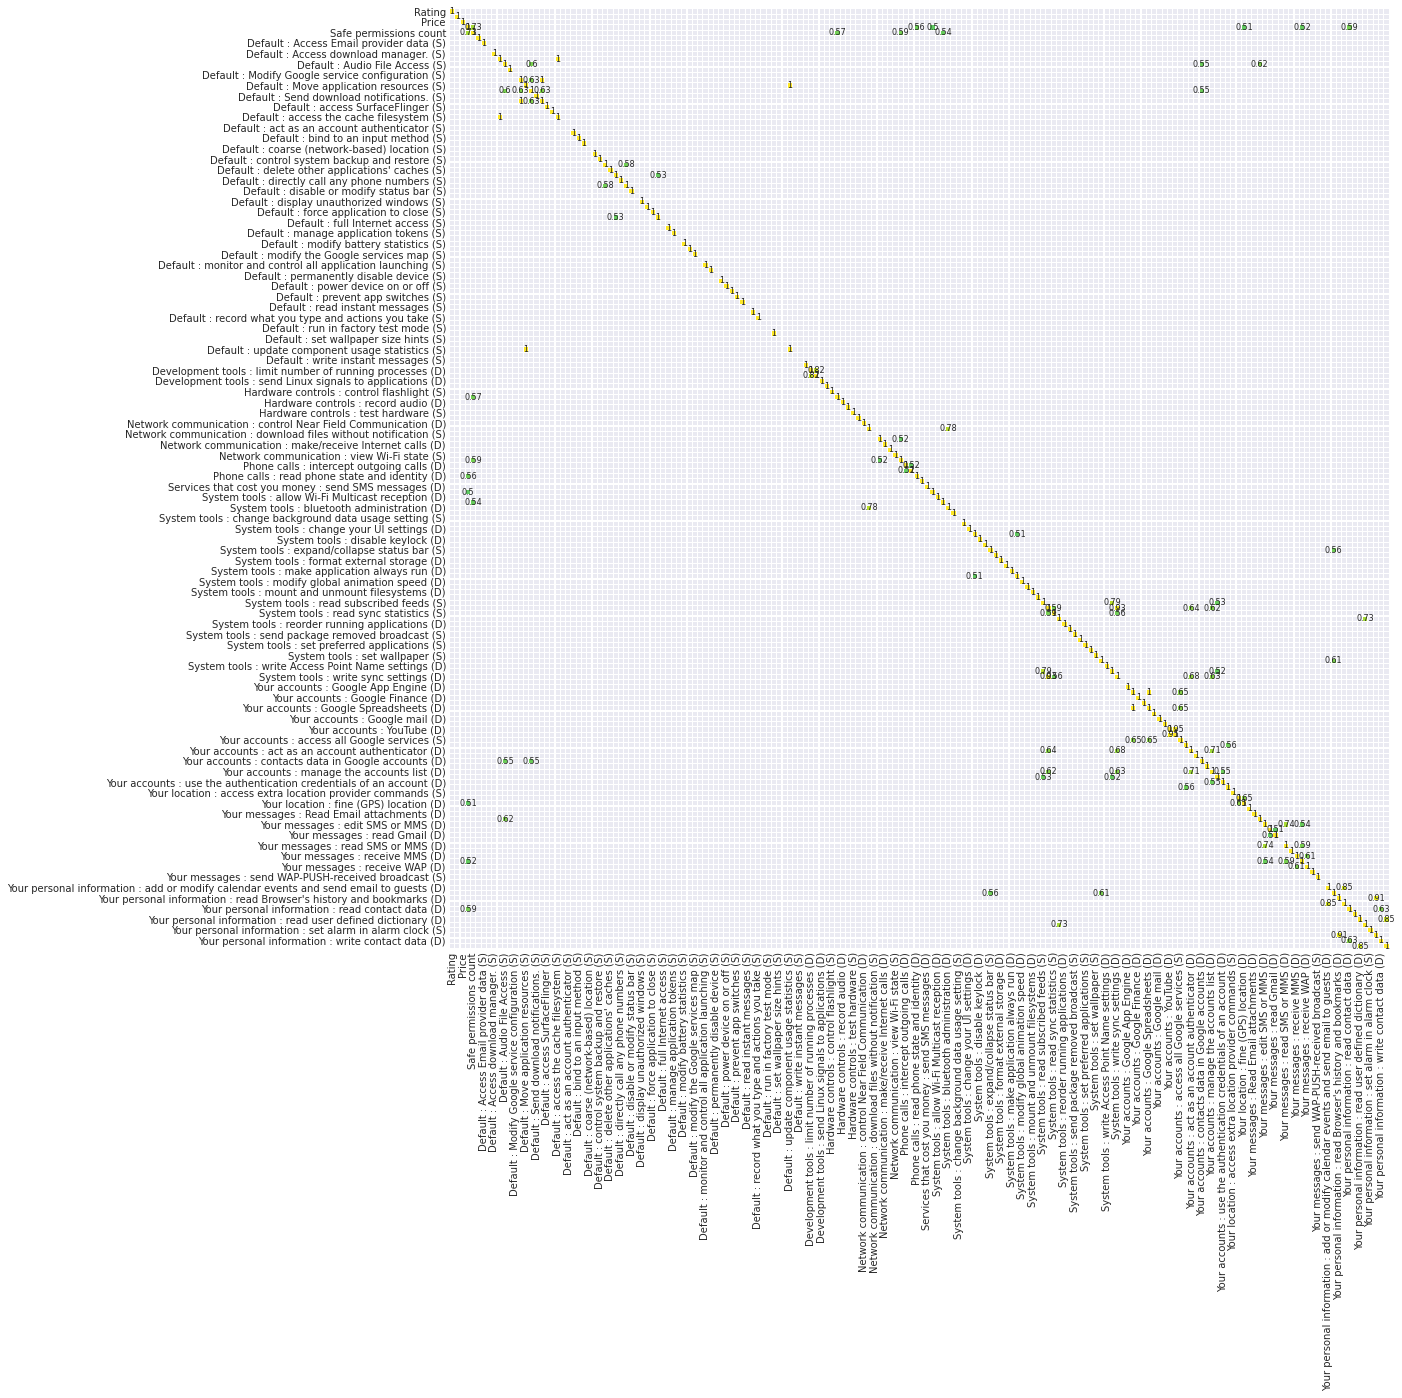

In [31]:
plt.figure(figsize=(15,30))
corr = df_num.drop('Class', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', cbar=False, vmax=1, vmin=-1, linewidths=0.1, annot=True, annot_kws={'size': 8}, square=True);